# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

Business Case Study: Find the best add based on customer engagement. Meaning if a customer clicks on the add -> 1 if a customer doesn't -> 0

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [6]:
import math
N = 10000 # total number of iterations/users
d = 10 # total number of ads
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n  in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0): # this means the add was selected atleast once
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else: # this means the add was never selected before
            upper_bound = 1e400 # 1*10^400 -> set a very high upper bound

        if (upper_bound > max_upper_bound):
                max_upper_bound = upper_bound
                ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = dataset.values[n, ad] # row is the user n and column is the ad (0 or 1)
        sums_of_rewards[ad] += reward
        total_reward += reward

## Visualising the results

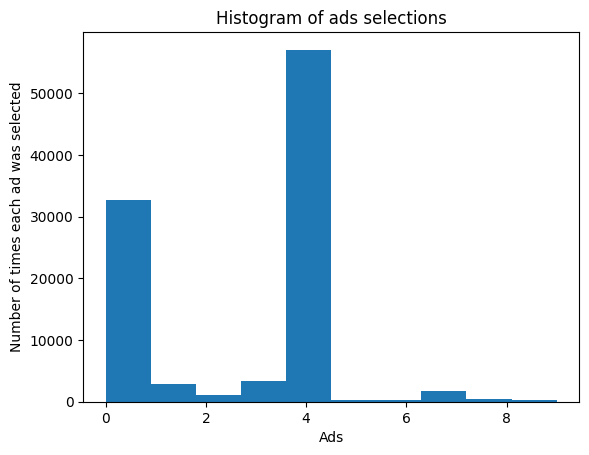

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()